# Prova Prática 
## Ana Powarchuk Xavier Xavier

In [ ]:
pip install opencv-python

In [ ]:
#Bibliotecas
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np 
import PIL.Image as Image
plt.style.use("dark_background")


# **Questão 1**
### Utilizado as suas funções para execução da fechamento e abertura em imagens em python, execute a filtragem de elementos “pequenos”, isto é, as estrelas pequenas da imagem “Fig0334” do capítulo 3, do livro texto de González. Plote, a imagem original e a imagem filtrada, uma ao lado da outra. Discuta qualitativamente o resultado de sua filtragem. (2 pontos)

In [ ]:
# Carregamento da imagem
imagem = cv2.imread('Fig0334.tif')

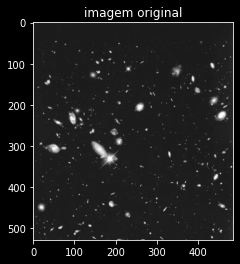

In [ ]:
# Filtro 
N = 7

# Filtro Retangular 
filtro_r = cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) 
# Filtro Eliptica
filtro_e = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) 
# Filtro em cruz
filtro_c = cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) 

# Escolha da Filtro
filtro = filtro_r 

# Transformando em array
imagem = np.array(imagem)

# Normalizando a imagem
normalizada = (imagem - imagem.min())/(imagem.max()-imagem.min())

plt.figure();
plt.imshow(normalizada, cmap= 'gray');plt.title('imagem original');

In [ ]:
# Erosão
erosao = cv2.erode(normalizada, filtro)

# Dilatação
dilatacao = cv2.dilate(normalizada, filtro)

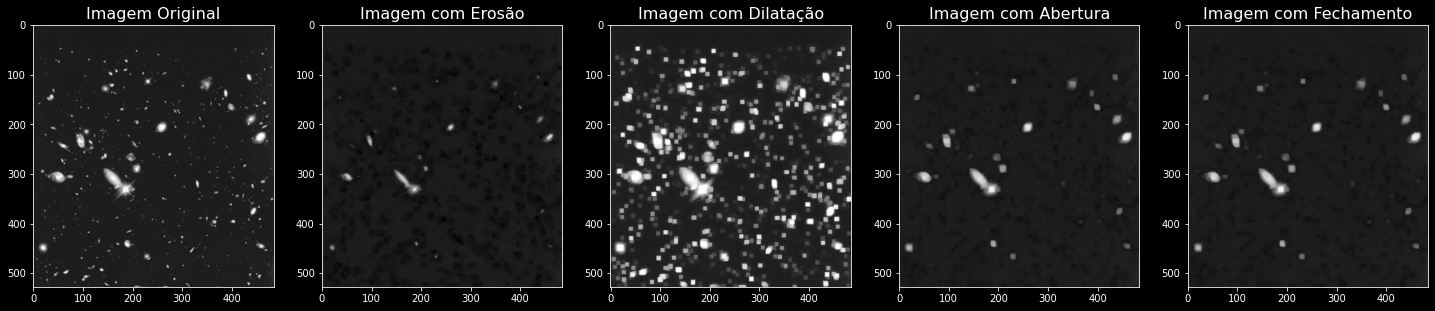

In [ ]:
# Abertura (dilataçao da erosao)
com_abertura = erosao
com_abertura = cv2.dilate(com_abertura, filtro)

# Fechamento (erosao de dilatação)
com_fechamento = dilatacao;
com_fechamento = cv2.erode(com_fechamento, filtro)


# Plotes
plt.figure(figsize = (25,15));
plt.subplot(1,5,1);
plt.imshow(normalizada, cmap='gray');
plt.title('Imagem Original',size=16);

plt.subplot(1,5,2);
plt.imshow(erosao, cmap='gray');
plt.title('Imagem com Erosão',size=16);

plt.subplot(1,5,3);
plt.imshow(dilatacao, cmap='gray');
plt.title('Imagem com Dilatação',size=16);

plt.subplot(1,5,4);
plt.imshow(com_abertura, cmap='gray');
plt.title('Imagem com Abertura',size=16);

plt.subplot(1,5,5);
plt.imshow(com_abertura, cmap='gray');
plt.title('Imagem com Fechamento',size=16);

**Discussão:** Com a aplicação de abertura e fechamento, as estrelas somem mas a qualidade da imagem diminui também.

# **Questão 2**
### Conforme a Figura 3.59, do capítulo 3 de Gonzalez. Utilize a técnica de aguçamento/realce as bordas  para melhor os contorno e bordas da imagem. Plote o resultado e faça uma análise qualitativa. (2 pontos)

Valor máximo de pixel da imagem original:  1.0

Valor máximo de pixel da imagem normalizada:  1.0


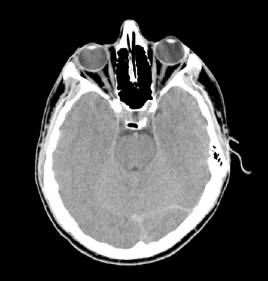

In [ ]:
# Lendo a imagem
imagem = cv2.imread('Fig0359.tif')

# Transformando a imagem em uma array
imagem = np.array(imagem)

# Normalizando a imagem
imagem = (imagem - imagem.min())/(imagem.max()-imagem.min())

print("Valor máximo de pixel da imagem original: ", imagem.max())
print('\nValor máximo de pixel da imagem normalizada: ', imagem.max())

plt.figure(figsize=(10, 5), constrained_layout=False)
plt.subplot(121), plt.imshow(imagem, "gray")
plt.axis('off')
plt.show()

In [ ]:
# Função de Convolução
def convolucao(imagem, filtro):
    borda = (filtro.shape[0]-1)//2
    altura = imagem.shape[0]
    largura = imagem.shape[1]
    nova_imagem = np.zeros((altura, largura))
    filtro = filtro[::-1,::-1]

    for x in range(borda, altura-borda): 
        for y in range(borda, largura-borda):
            nova_imagem[x,y] =np.sum(imagem[x-borda:x+borda+1, y-borda:y+borda+1]*filtro)

    return nova_imagem

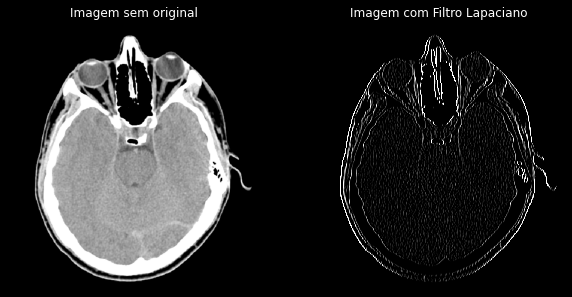

In [ ]:
# Filtro Laplaciano (aguçamento)
filtro_laplace = np.array([[-1, -1, -1], 
                              [-1, 8, -1], 
                              [-1, -1, -1]]) 

# Plotando o resultado
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.axis('off')
plt.title('Imagem sem original')
plt.imshow(imagem, cmap='gray')

plt.subplot(1,2,2)
plt.axis('off')
plt.title('Imagem com Filtro Lapaciano')
plt.imshow(convolucao(imagem, filtro_laplace), cmap='gray', vmin=0, vmax=1)

Análise Qualitativa: Com a aplicação da convolução e do filtro lapalciano, é possível ressaltar as bordas.

# **Questão 3**
### Seja o trecho de uma imagem em escala grayscale (TIEG) abaixo. Deseja-se aplicar um filtro que seja capaz de detectar a borda presente neste TIEG. Pergunta-se: (3 pontos)                     

### TIEG:           

### [ 100    10     10
###  10      100    10
###  10      10   100 ]

### a)      Qual filtro você escolheria para esta detecção? Justifique sua escolha; 
Com o intuito de detectar, o filtro que eu escolheria, seria o Filtro de Lapace, um filtro de aguçamento que utiliza a convolução a fim de identificar as diferenças presente entre pixels vizinhos, indicando pontos de borda.


### b)     Aplique o filtro escolhido neste TIEG e discuta o resultado obtido. Qual será o resultado que o usuário verá na tela do computador?

In [ ]:
# Função de Convolução
def convolucao(imagem, filtro):
    borda = (filtro.shape[0]-1)//2
    altura = imagem.shape[0]
    largura = imagem.shape[1]
    nova_imagem = np.zeros((altura, largura))
    filtro = filtro[::-1,::-1]

    for x in range(borda, altura-borda): 
        for y in range(borda, largura-borda):
            nova_imagem[x,y] =np.sum(imagem[x-borda:x+borda+1, y-borda:y+borda+1]*filtro)

    return nova_imagem

In [ ]:
# Filtro Laplaciano (aguçamento) - responsavel por extrair as bordas de elementos
filtro_laplace = np.array([[-1, -1, -1], 
                              [-1, 8, -1], 
                              [-1, -1, -1]]) 

Resultado após a filtragem: 
 [[  0.   0.   0.]
 [  0. 540.   0.]
 [  0.   0.   0.]]

Plotagem:


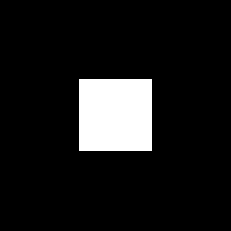

In [ ]:
ti = np.array([[100,10,10],[10,100,10],[10,10,100]])

final = convolucao(ti, filtro_laplace)

print('Resultado após a filtragem: \n', final)

print('\nPlotagem:')
plt.imshow(final, "gray")
plt.axis('off')
plt.show()

**Discussão:** O Filtro Laplaciano é um operador linear, invariante à translação
(isotrópico) e sua função de transferência é zero na origem do espaço de frequência. Como o laplaciano é uma derivada, a soma dos coeficientes tem que ser nula (toda a vez que o ponto em questão e seus vizinhos tiverem o mesmo valor, a resposta será nula). A imagem trará uma borda destacada, de forma com que os pixels mais externos apresentem o valor 0, como visto na imagem acima.

# **Questão 4**
### 4) Seja o trecho de imagem (TI) 3 x 3 abaixo: ( 3 pontos)

### [ 100     4       5
###  6       102      5
###  6       5     100 ]

### Pede-se:





### a) Este TI contém que tipo de informação em termos de conteúdo espectral (bordas, região homogênea, etc)? Justifique sua resposta.

(-0.5, 2.5, 2.5, -0.5)

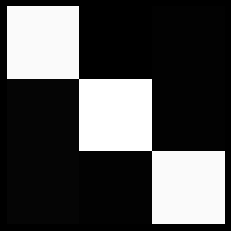

In [ ]:
ti = np.array([[100,4,5],[6,102,5],[6,5,100]])

plt.imshow(ti, cmap="gray")
plt.axis('off')

**Justificativa:** Como podemos ver na imagem plotada acima, a informação em termos de conteúdo espectral disponível apresentada são as bordas, visto que as mesmas se repetem nas bordas.

### b) Quantas funções de base teremos para plotar o espectro (gráficos de módulo e fase dos coeficientes) de Fourier 2D deste TI? Plote cada uma destas funções de base e determine o ângulo de borda que cada uma delas poderá detectar.
A fim de plotar o espectro em magnitude da Fourier 2D do TI apresentado, teremos duas funções de base: (no python) fft.fft2() e fft.fftshift():

*  **fft.fft2():** é responsável por realizar o cálculo da transformada de Fourier Discreta bidimensional. A transformada é responsável pela filtragem de imagens no domínio da frequência.
*   **fft.fftshift():** é responsável por mudar o componente de frequência zero para o centro do espectro, a partir dela é possível a aplicação de filtros.

In [ ]:
ti = np.array([[100,4,5],[6,102,5],[6,5,100]])

print ('DFT2D:')
dft2d = np.fft.fft2(ti)
print(dft2d)

print ('\n\nÂngulo de Borda da DFT2D (radianos):')
angulo_dft2d = np.angle(dft2d) 
print(angulo_dft2d)

DFT2D:
[[333. +0.j           1.5-0.8660254j    1.5+0.8660254j ]
 [ -3. -1.73205081j  -1.5+2.59807621j 286.5-0.8660254j ]
 [ -3. +1.73205081j 286.5+0.8660254j   -1.5-2.59807621j]]


Ângulo de Borda da DFT2D (radianos):
[[ 0.         -0.52359878  0.52359878]
 [-2.61799388  2.0943951  -0.00302277]
 [ 2.61799388  0.00302277 -2.0943951 ]]


In [ ]:
print ('Centralizado: ')
centralizada = np.fft.fftshift(dft2d) 
print(centralizada)


angulo_centralizada = np.angle(centralizada)
print ('\n\nÂngulo de Borda Centralizado (radianos):')
print(angulo_centralizada)

Centralizado: 
[[ -1.5-2.59807621j  -3. +1.73205081j 286.5+0.8660254j ]
 [  1.5+0.8660254j  333. +0.j           1.5-0.8660254j ]
 [286.5-0.8660254j   -3. -1.73205081j  -1.5+2.59807621j]]


Ângulo de Borda Centralizado (radianos):
[[-2.0943951   2.61799388  0.00302277]
 [ 0.52359878  0.         -0.52359878]
 [-0.00302277 -2.61799388  2.0943951 ]]


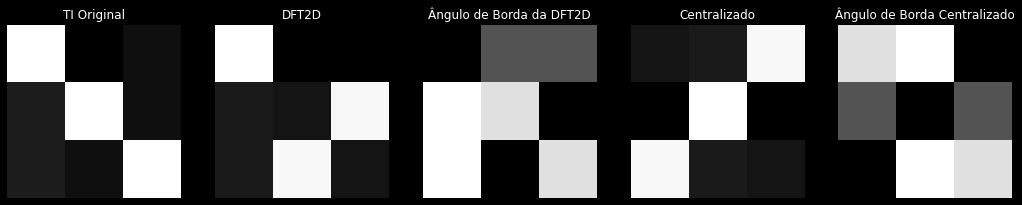

In [ ]:
fig = plt.subplots(1,5, figsize=(18,12))


plt.subplot(1,5,1), plt.imshow(np.log(1+np.abs(ti)), "gray"), plt.title("TI Original")
plt.axis('off')

plt.subplot(1,5,2), plt.imshow(np.log(1+np.abs(dft2d)), "gray"), plt.title("DFT2D")
plt.axis('off')

plt.subplot(1,5,3), plt.imshow(np.log(1+np.abs(angulo_dft2d)), "gray"), plt.title("Ângulo de Borda da DFT2D")
plt.axis('off')

plt.subplot(1,5,4), plt.imshow(np.log(1+np.abs(centralizada)), "gray"), plt.title("Centralizado")
plt.axis('off')

plt.subplot(1,5,5), plt.imshow(np.log(1+np.abs(angulo_centralizada)), "gray"), plt.title("Ângulo de Borda Centralizado")
plt.axis('off')

plt.show()